In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from utils import *
from data import *
from plotting import *
from evaluation import *

In [26]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
sns.set(style='whitegrid')
pd.set_option('mode.chained_assignment', None)

# Read data

In [8]:
sdss = read_fits_to_pandas(os.path.join(DATA_PATH, 'SDSS/specObj-dr14.fits'), columns=COLUMNS_SDSS)
sdss = clean_sdss(sdss)

Cleaning SDSS: 4151126 left


In [9]:
sdss_x_gaia = read_fits_to_pandas(os.path.join(DATA_PATH, 'SDSS/SDSS.DR14.x.GAIA.DR2.fits'),
                                  columns=COLUMNS_SDSS+COLUMNS_GAIA)
sdss_x_gaia = clean_sdss(sdss_x_gaia)

Cleaning SDSS: 1426995 left


In [10]:
kids_x_sdss = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), sdss_cleaning=True,
                           columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS, update_kids=True)

Data shape: (152244, 49)
Droping NANs: 130777 (85.90%) left
Cleaning SDSS: 122964 left


In [11]:
kids_x_sdss_x_gaia = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.x.GAIA.DR2.fits'),
                                  sdss_cleaning=True, columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS+COLUMNS_GAIA,
                                  update_kids=True)

Data shape: (55771, 55)
Droping NANs: 49464 (88.69%) left
Cleaning SDSS: 47543 left


# Describe data

In [12]:
print(get_column_desc(sdss['CLASS']))

GALAXY - 2541424 (61.22%)
QSO - 680843 (16.40%)
STAR - 928859 (22.38%)


In [13]:
print(get_column_desc(sdss_x_gaia['CLASS']))

GALAXY - 336129 (23.56%)
QSO - 361138 (25.31%)
STAR - 729728 (51.14%)


In [14]:
print(get_column_desc(kids_x_sdss['CLASS']))

GALAXY - 84728 (68.90%)
QSO - 13611 (11.07%)
STAR - 24625 (20.03%)


In [15]:
print(get_column_desc(kids_x_sdss_x_gaia['CLASS']))

GALAXY - 15717 (33.06%)
QSO - 9780 (20.57%)
STAR - 22046 (46.37%)


# SDSS x GAIA

5 position shape: (992384, 11)
Removing paralax_error: (867941, 14)
Removing pmra_error: (721039, 14)
Removing pmdec_error: (702355, 14)
GALAXY - 3784 (0.54%)
QSO - 138428 (19.71%)
STAR - 560143 (79.75%)
QSO:
              parallax        pmra       pmdec
mean        -0.0172845  -0.0209419  -0.0258889
sigma         0.517696     1.71207     1.81492
mean_error  0.00139143  0.00460161  0.00487805
median      -0.0262785  -0.0106862  0.00750385
STAR:
              parallax       pmra      pmdec
mean          0.710942   -1.80905   -6.37026
sigma          1.38027    11.9131    10.8621
mean_error  0.00184422  0.0159175  0.0145133
median         0.38428   -1.12754   -4.21969
GALAXY:
             parallax       pmra     pmdec
mean         0.156374  -0.699663  -2.49742
sigma         1.18417     5.6863   6.66779
mean_error  0.0192503  0.0924388  0.108394
median       0.108192  -0.123484 -0.633517


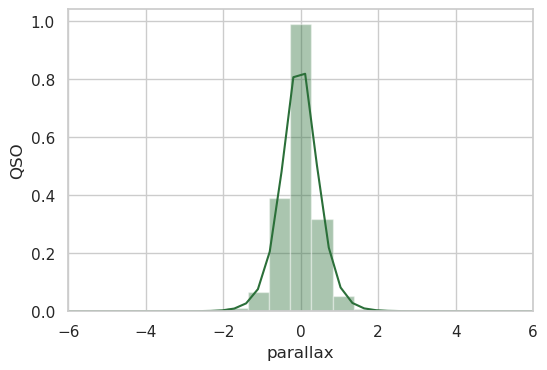

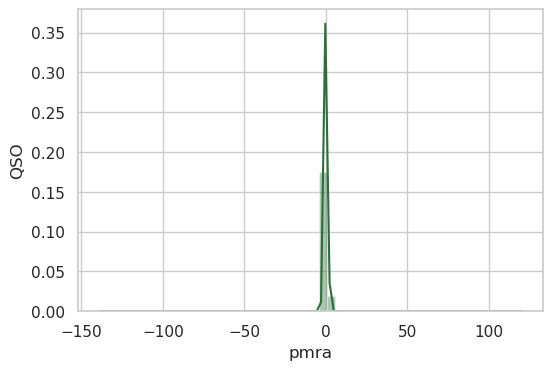

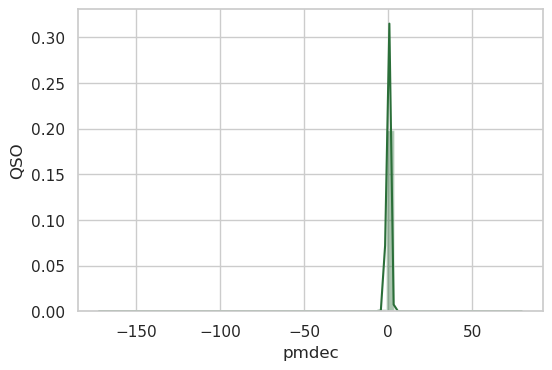

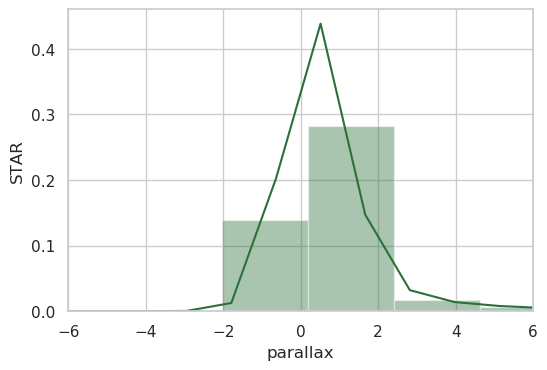

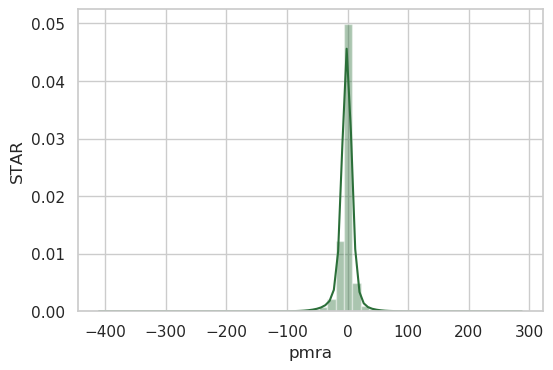

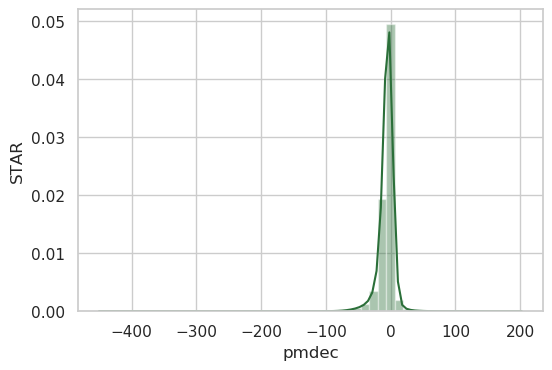

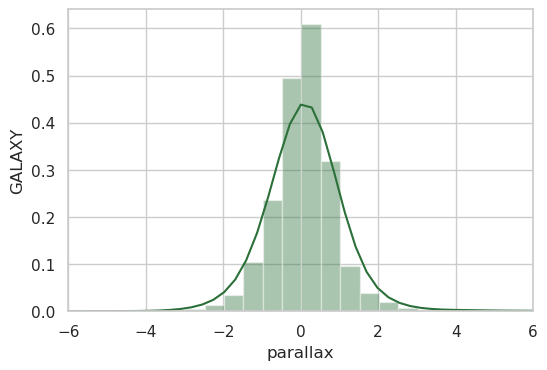

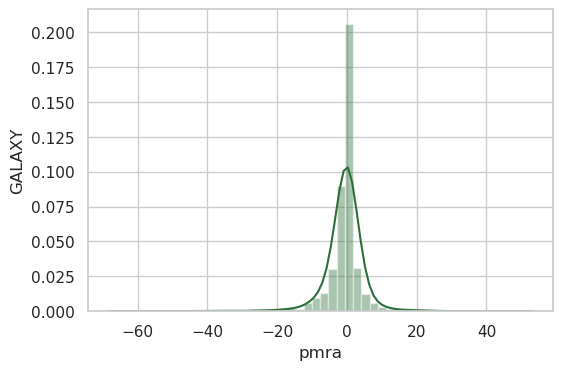

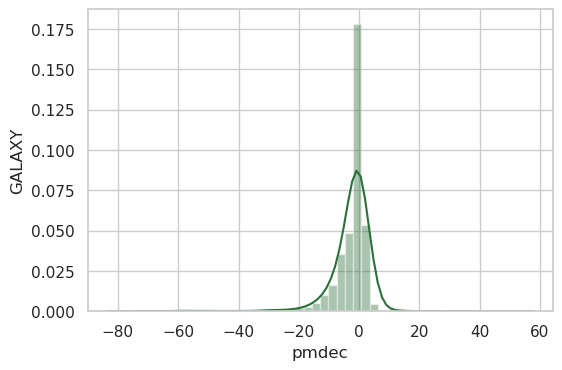

In [27]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, parallax_error=1, pm_error=1)
print(get_column_desc(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, class_col='CLASS')

5 position shape: (992384, 11)
Removing paralax_error: (867941, 14)
GALAXY - 10150 (1.17%)
QSO - 223292 (25.73%)
STAR - 634499 (73.10%)
QSO:
              parallax        pmra       pmdec
mean        -0.0201979  -0.0166721  -0.0135103
sigma         0.650617     1.71756     1.73198
mean_error  0.00137686  0.00363477  0.00366527
median      -0.0266153  -0.0105627   0.0104214
STAR:
              parallax       pmra      pmdec
mean          0.729927   -1.78266   -6.27648
sigma          1.45934    12.1329    10.9755
mean_error  0.00183206  0.0152318  0.0137787
median         0.38836   -1.08346   -4.08162
GALAXY:
             parallax       pmra      pmdec
mean       -0.0253056  -0.304107   -1.29636
sigma         1.16164    4.58028    5.37952
mean_error  0.0115303  0.0454631  0.0533962
median     -0.0279519 -0.0133471  -0.293786


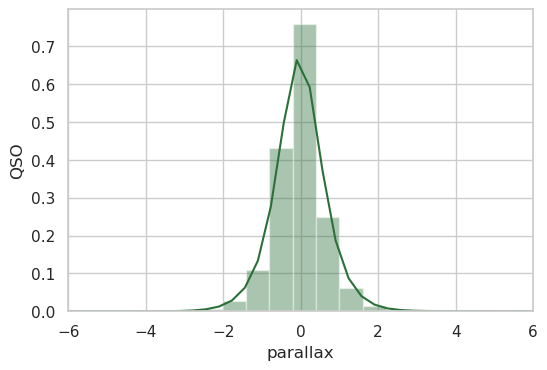

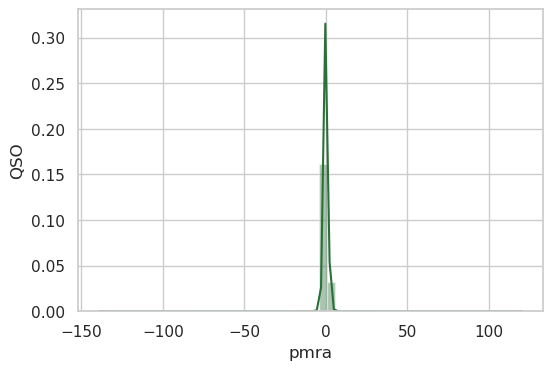

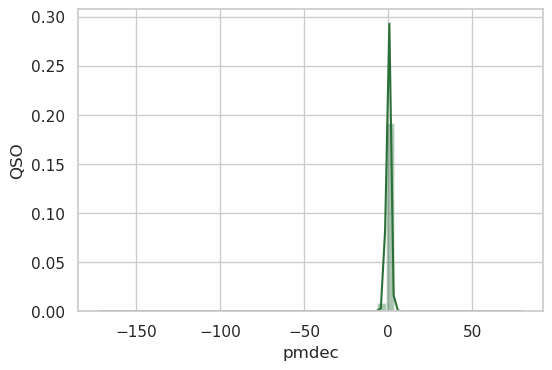

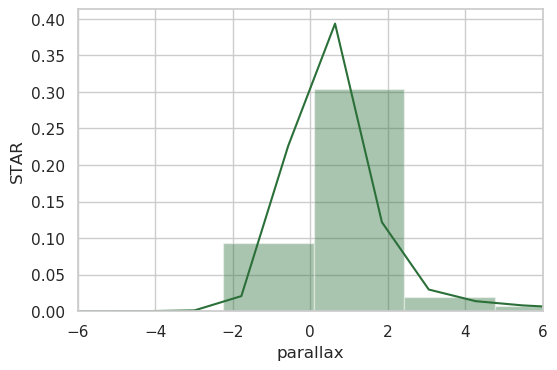

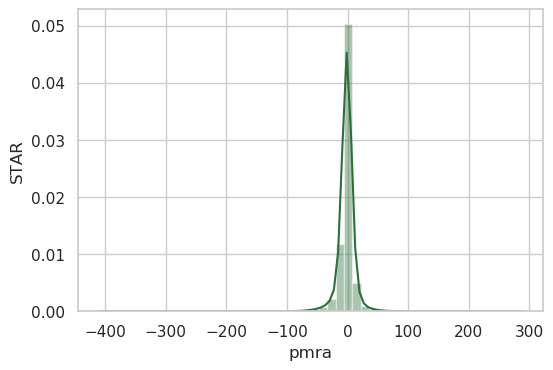

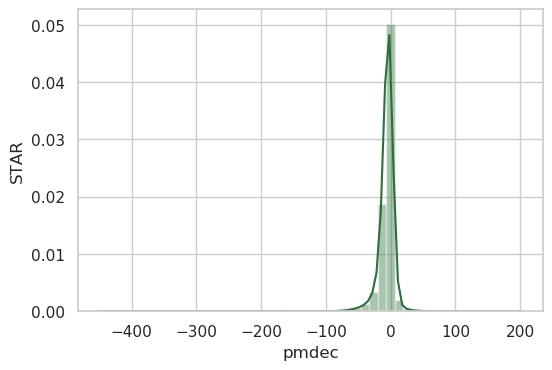

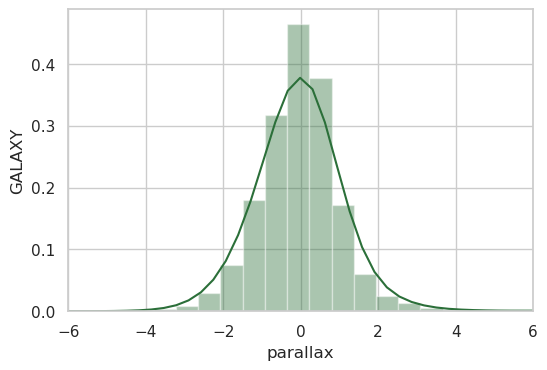

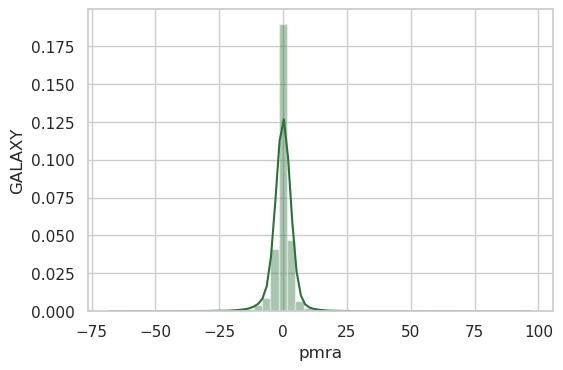

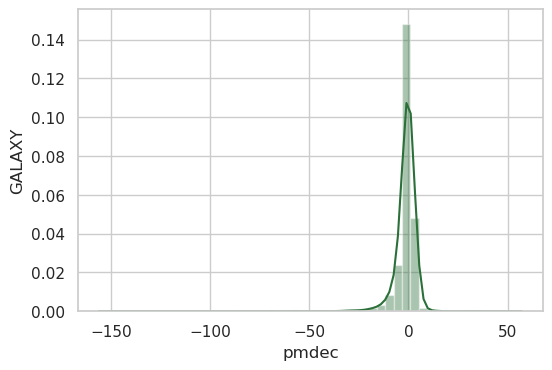

In [28]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, parallax_error=1, pm_error=None)
print(get_column_desc(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, class_col='CLASS')

# KiDS x SDSS x GAIA

5 position shape: (28560, 153)
Removing paralax_error: (24969, 156)
Removing pmra_error: (19566, 156)
Removing pmdec_error: (19462, 156)
GALAXY - 118 (0.61%)
QSO - 3859 (19.83%)
STAR - 15485 (79.57%)
QSO:
              parallax        pmra      pmdec
mean       -0.00450703 -0.00998079 -0.0117933
sigma         0.455086     2.04443    1.34638
mean_error  0.00732582   0.0329105  0.0216736
median      -0.0113339  -0.0158939 -0.0020249
STAR:
             parallax       pmra      pmdec
mean         0.595182   -6.29608   -6.19967
sigma         1.25028    11.2685    9.78053
mean_error  0.0100474  0.0905548  0.0785971
median       0.333435   -3.82349   -3.97394
GALAXY:
             parallax      pmra    pmdec
mean         0.231149  -3.93257 -3.49948
sigma        0.656269   7.20771  5.58727
mean_error  0.0604144  0.663523  0.51435
median       0.247401  -1.29589 -1.49477


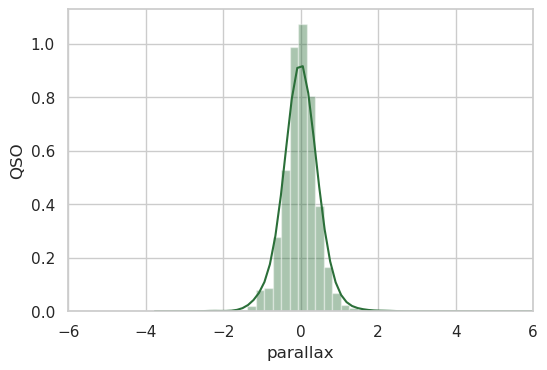

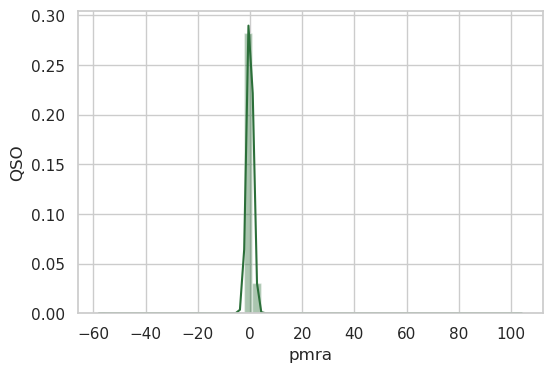

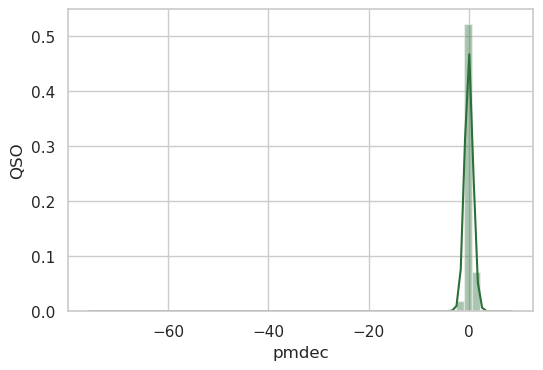

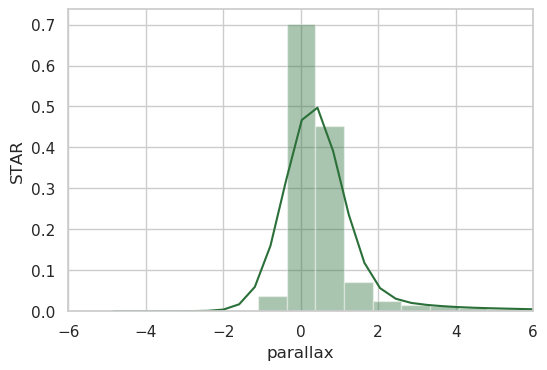

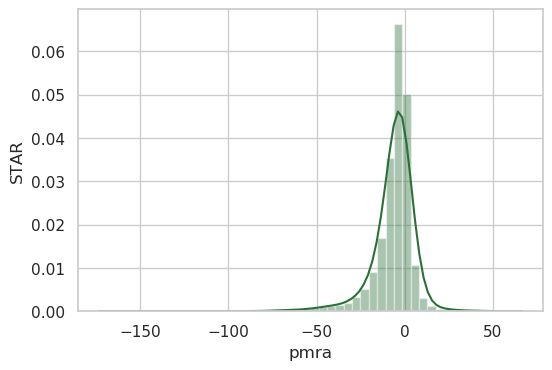

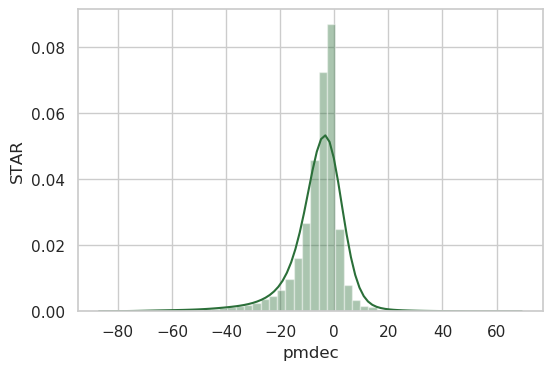

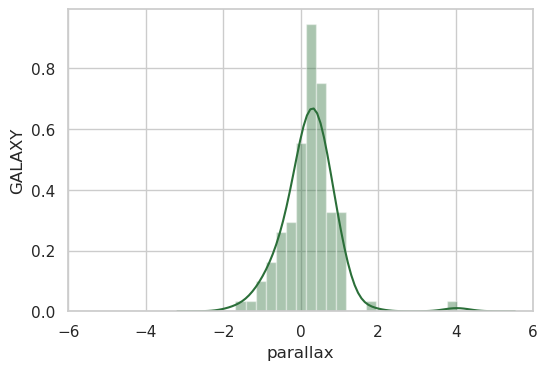

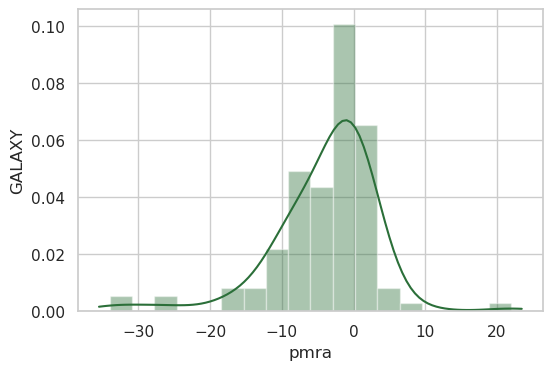

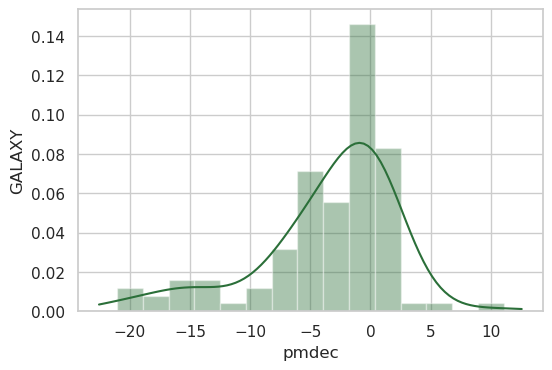

In [29]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, parallax_error=1, pm_error=1)
print(get_column_desc(kids_x_sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean, class_col='CLASS')

5 position shape: (28560, 153)
Removing paralax_error: (24969, 156)
GALAXY - 297 (1.19%)
QSO - 6560 (26.27%)
STAR - 18112 (72.54%)
QSO:
               parallax        pmra       pmdec
mean       -0.000477103 -0.00672557  -0.0157574
sigma          0.623138     1.87925     1.32114
mean_error   0.00769365   0.0232023   0.0163116
median       -0.0132002  -0.0163703 -0.00345633
STAR:
              parallax     pmra      pmdec
mean             0.609 -6.11025    -5.9861
sigma          1.33798  11.3129    9.73438
mean_error  0.00994182  0.08406  0.0723311
median        0.335875 -3.53225   -3.75148
GALAXY:
             parallax      pmra     pmdec
mean        0.0532346  -1.97347   -1.6435
sigma        0.977827   5.33778   4.44485
mean_error  0.0567393  0.309729  0.257916
median      0.0919557 -0.672155 -0.228095


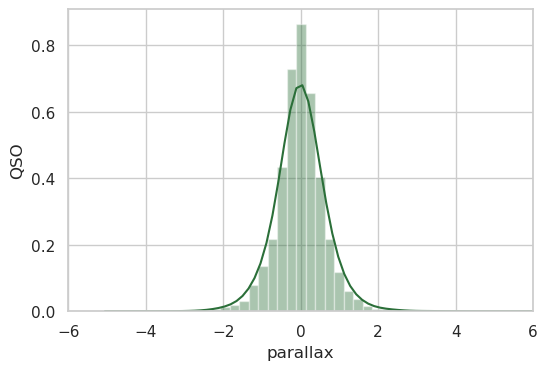

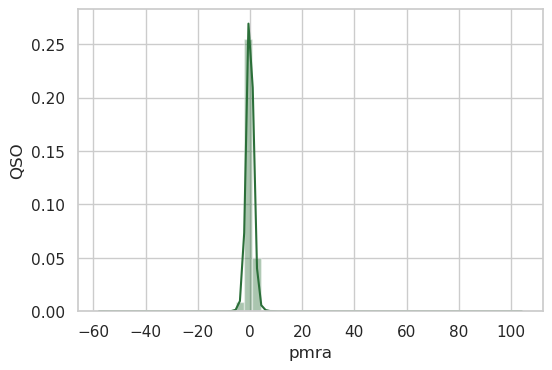

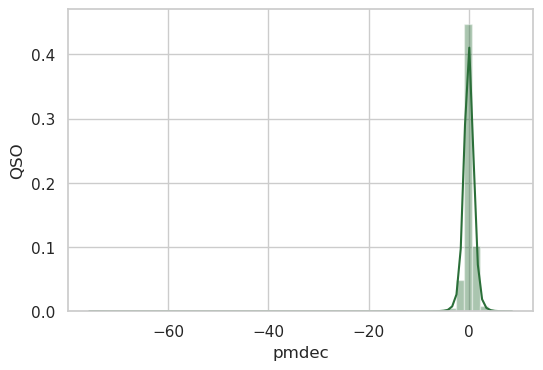

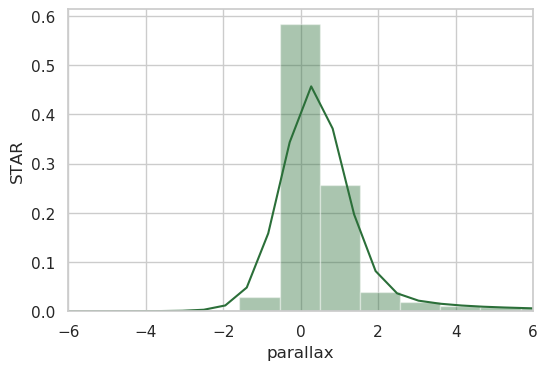

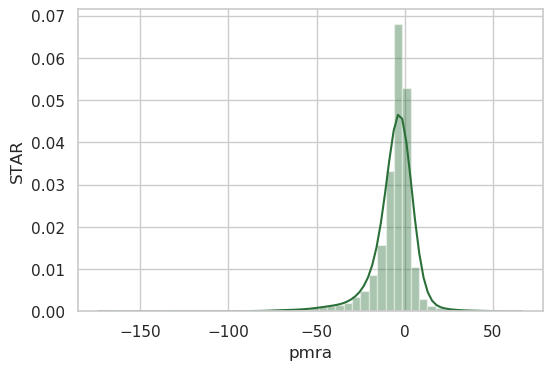

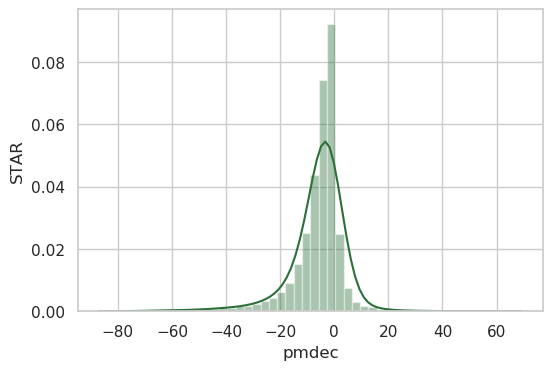

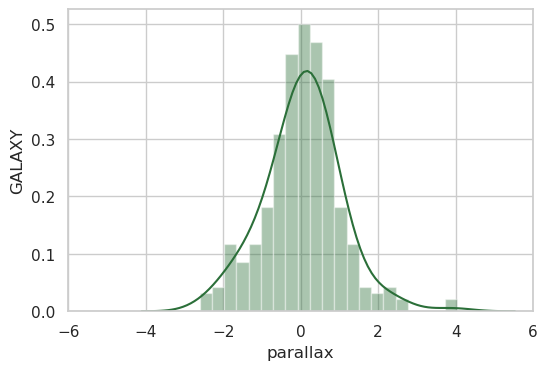

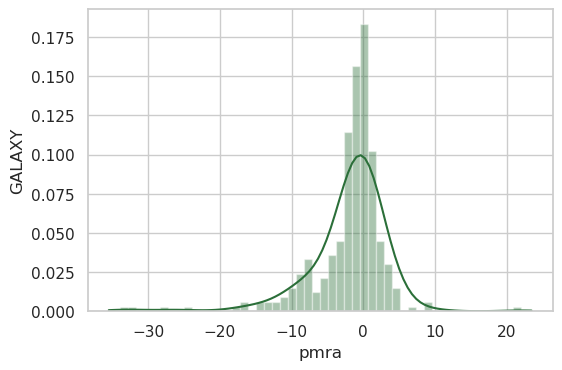

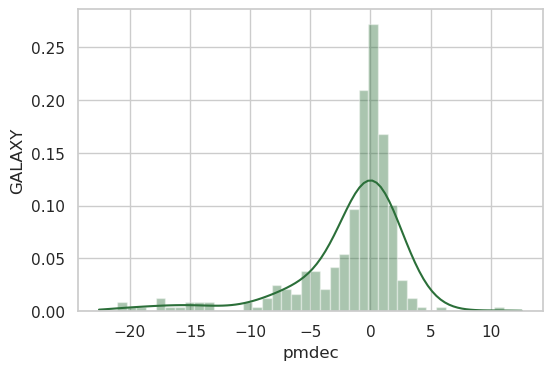

In [30]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, parallax_error=1, pm_error=None)
print(get_column_desc(kids_x_sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean, class_col='CLASS')

# Acceptable based on the experiments

In [23]:
qso = 0.969
star = 0.004
gal = 0.026

In [31]:
# Parallax and proper motions error limit
print('SDSS parallax mean')
print(qso * -0.02 + star * 0.71 + gal * 0.16)
print('SDSS parallax mean error')
print(qso * 0.0014 + star * 0.0018 + gal * 0.0193)

print('train parallax')
print(qso * -0.005 + star * 0.60 + gal * 0.23)

SDSS parallax mean
-0.012380000000000002
SDSS parallax mean error
0.0018655999999999998
train parallax
0.0035349999999999995


In [25]:
# Parallax error limit
print('SDSS parallax mean')
print(qso * -0.02 + star * 0.73 + gal * -0.03)

print('train parallax mean')
print(qso * -0.0005 + star * 0.61 + gal * 0.05)

SDSS parallax
-0.017240000000000002
train parallax
0.0032554999999999997
